# Simple Neural Network for the MNIST dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import keras, random, math
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.regularizers import l2

c:\python\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using Theano backend.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Load and view data

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print('Number of images (digits): ', x_train.shape[0]) 
print('Dimenions of X: ', x_train.shape[1], 'x', x_train.shape[2])

Number of images (digits):  60000
Dimenions of X:  28 x 28


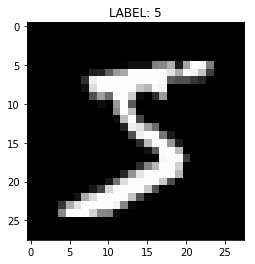

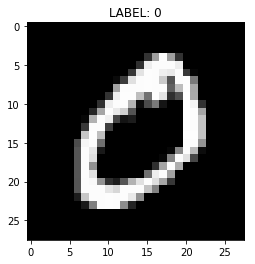

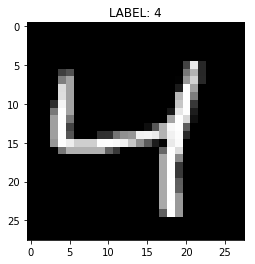

In [4]:
for i in range(3): 
    plt.title('LABEL: {label}'.format(label=y_train[i]))
    plt.imshow(x_train[i], cmap='gray')
    plt.show()

## Build Model

In [5]:
# 28x28 = 784
model = Sequential([Dense(80, input_shape=(784,), W_regularizer=l2(.005)), 
                       Activation('relu'),
                       Dense(40),
                       Activation('relu'),
                       Dense(30),
                       Activation('relu'),
                       Dense(10),
                       Activation('softmax'),
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

c:\python\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(80, input_shape=(784,), kernel_regularizer=<keras.reg...)`
  


### Re-format data

In [6]:
y_train_hot = keras.utils.to_categorical(y_train, num_classes=10)

#test if one-hot worked, should have a one in the 6th place to represent 5
#y_train_hot[0]

x_train_unroll = x_train.reshape(60000, 784)
x_test_unroll = x_test.reshape(10000, 784)

### Train neural network with training data, 10 iterations through entire dataset

In [7]:
model.fit(x_train_unroll, y_train_hot, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 7s 114us/step - loss: 2.6211 - acc: 0.7874
Epoch 2/10
60000/60000 [==============================] - 10s 158us/step - loss: 0.5274 - acc: 0.9243
Epoch 3/10
60000/60000 [==============================] - 9s 149us/step - loss: 0.3578 - acc: 0.9408
Epoch 4/10
60000/60000 [==============================] - 9s 152us/step - loss: 0.2939 - acc: 0.9476
Epoch 5/10
60000/60000 [==============================] - 10s 161us/step - loss: 0.2639 - acc: 0.9523
Epoch 6/10
60000/60000 [==============================] - 11s 179us/step - loss: 0.2490 - acc: 0.9550
Epoch 7/10
60000/60000 [==============================] - 12s 204us/step - loss: 0.2450 - acc: 0.9544
Epoch 8/10
60000/60000 [==============================] - 15s 242us/step - loss: 0.2358 - acc: 0.9579
Epoch 9/10
60000/60000 [==============================] - 15s 251us/step - loss: 0.2303 - acc: 0.9588
Epoch 10/10
60000/60000 [==============================] - 16s 260us/step - loss: 0.2

## Use model to make predictions

In [8]:
prediction_hot = model.predict(x_test_unroll)
prediction = []

#convert from one-hot to regular
for line in prediction_hot:
    prediction.append(np.argmax(line))

### View predictions and labels

PREDICTION:  6


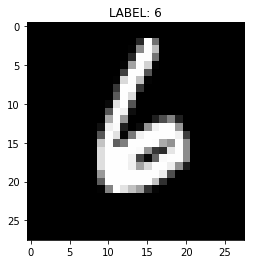

PREDICTION:  1


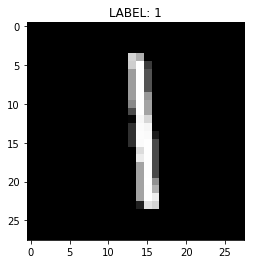

PREDICTION:  1


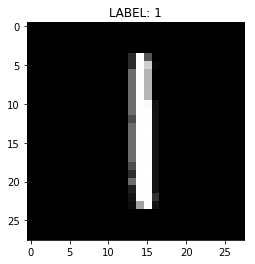

PREDICTION:  5


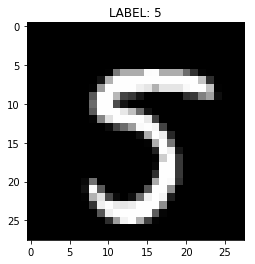

PREDICTION:  5


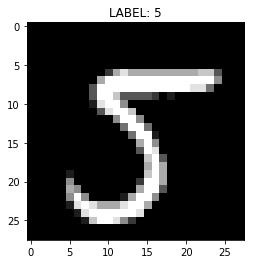

In [9]:
num = math.ceil(random.uniform(1,9995))

for i in range(num, num+5):
    print('PREDICTION: ', prediction[i])
    plt.title('LABEL: {label}'.format(label=y_test[i]))
    plt.imshow(x_test[i], cmap='gray')
    plt.show()
        

### Evaluate model
#### Sometimes the common errors are 8 and 5 or 6 and 5

In [10]:
correct = 0
incorrect = 0

for i in prediction:
    if prediction[i] == y_test[i]:
        correct += 1
    else:
        incorrect += 1
        print(prediction[i], '!=', y_test[i])

accuracy = correct / y_test.shape[0]

6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5
6 != 5

In [11]:
print(correct)
print(' Test Prediction Accuracy: ', accuracy * 100, '%')

8962
 Test Prediction Accuracy:  89.62 %


### Inspect most common error

PREDICTION:  6


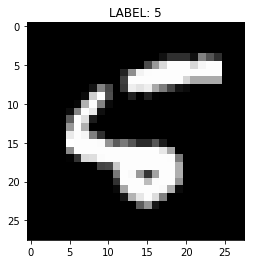

PREDICTION:  6


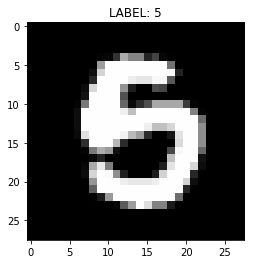

PREDICTION:  6


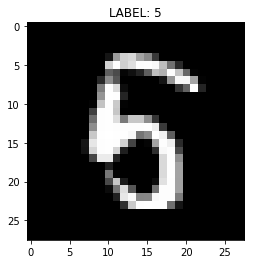

PREDICTION:  6


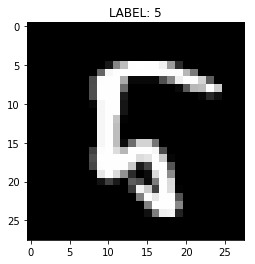

PREDICTION:  6


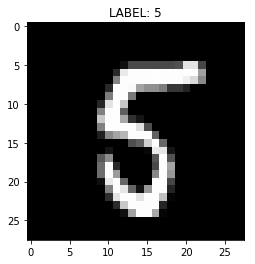

PREDICTION:  6


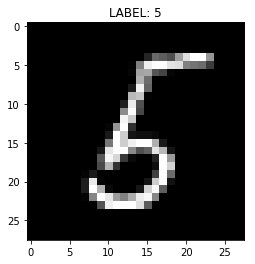

PREDICTION:  6


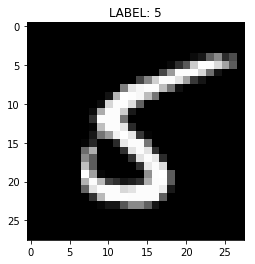

PREDICTION:  6


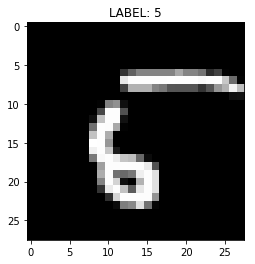

PREDICTION:  6


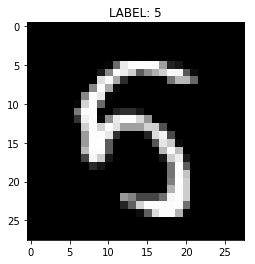

PREDICTION:  6


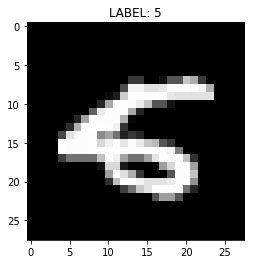

PREDICTION:  6


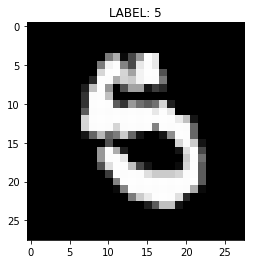

PREDICTION:  6


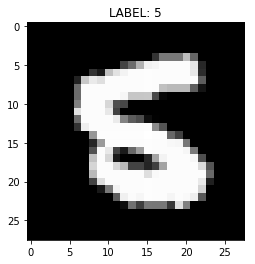

PREDICTION:  6


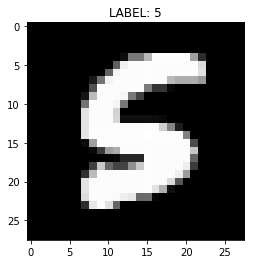

PREDICTION:  6


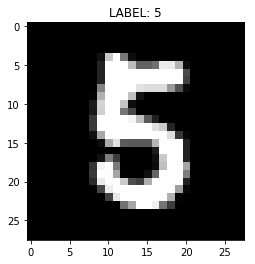

PREDICTION:  6


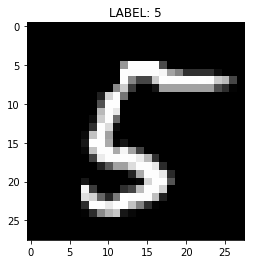

PREDICTION:  6


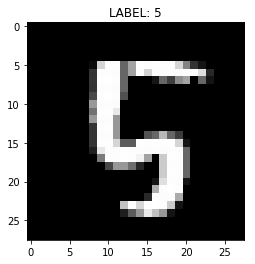

PREDICTION:  6


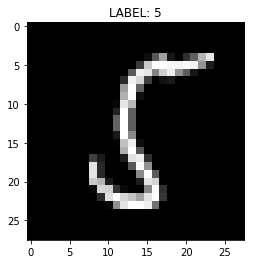

PREDICTION:  6


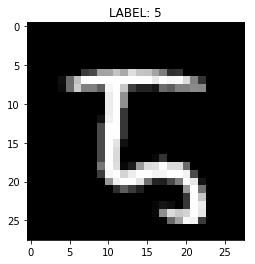

PREDICTION:  6


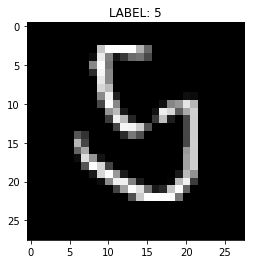

PREDICTION:  6


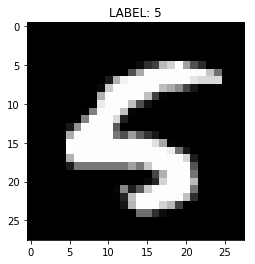

PREDICTION:  6


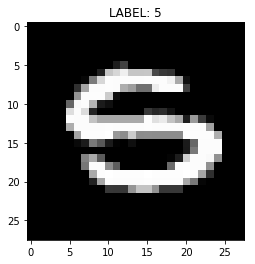

PREDICTION:  6


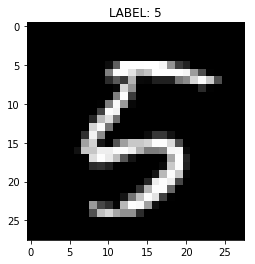

PREDICTION:  6


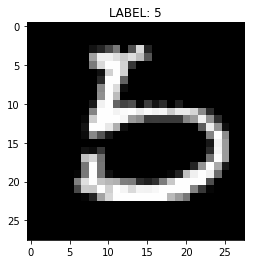

PREDICTION:  6


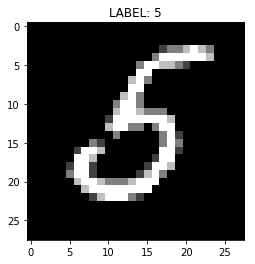

PREDICTION:  6


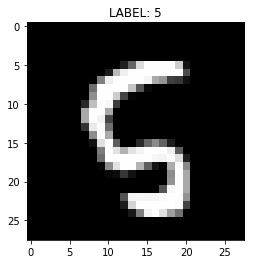

PREDICTION:  6


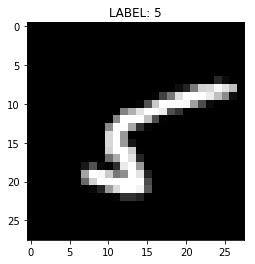

PREDICTION:  6


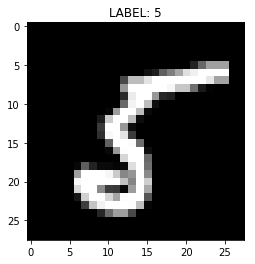

PREDICTION:  6


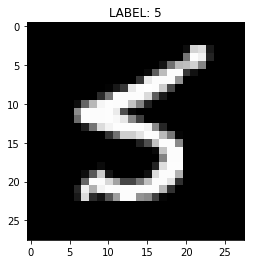

PREDICTION:  6


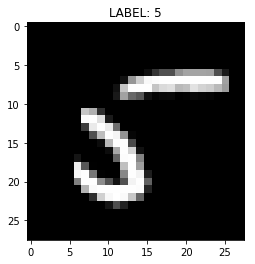

PREDICTION:  6


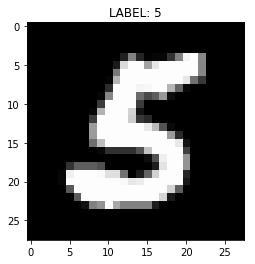

PREDICTION:  6


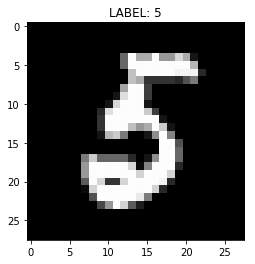

PREDICTION:  6


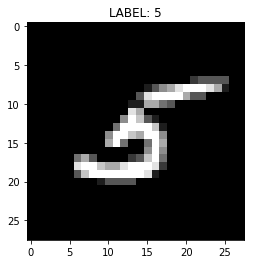

PREDICTION:  6


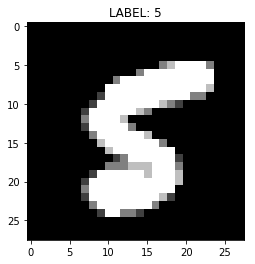

PREDICTION:  6


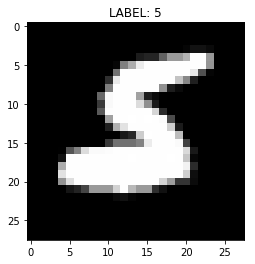

PREDICTION:  6


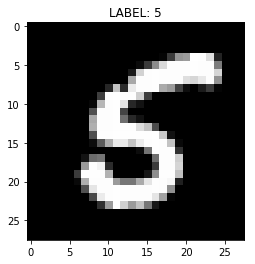

PREDICTION:  6


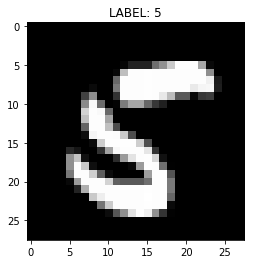

PREDICTION:  6


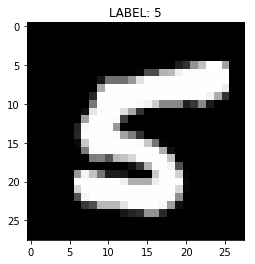

PREDICTION:  6


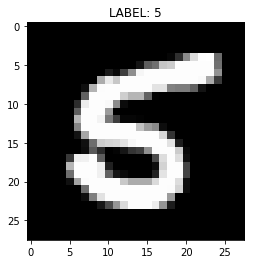

PREDICTION:  6


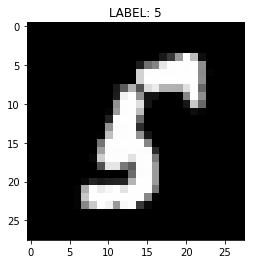

PREDICTION:  6


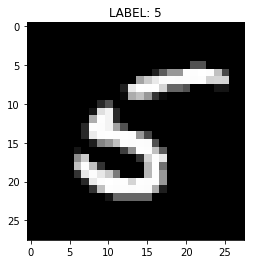

PREDICTION:  6


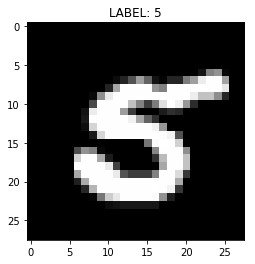

PREDICTION:  6


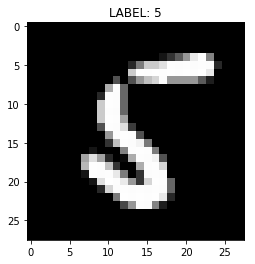

PREDICTION:  6


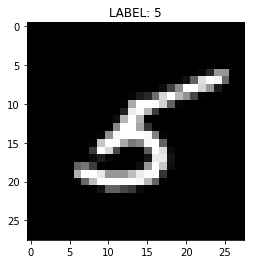

PREDICTION:  6


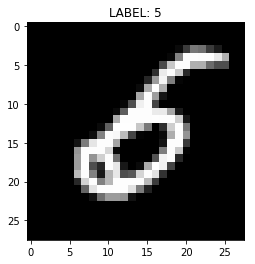

PREDICTION:  6


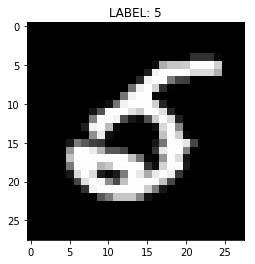

PREDICTION:  6


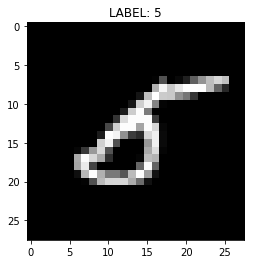

PREDICTION:  6


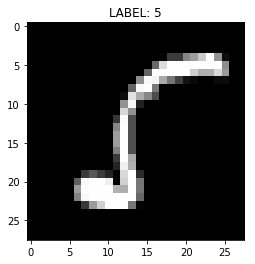

PREDICTION:  6


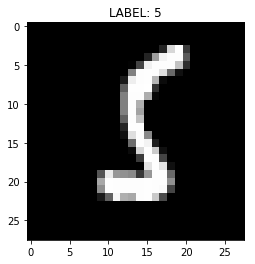

PREDICTION:  6


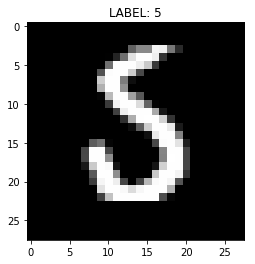

PREDICTION:  6


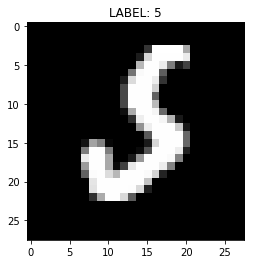

In [12]:
#Inspect data when prediction=6 and label=5
label_miss = 5
prediction_miss = 6
for i in range(10000):
    if prediction[i] == prediction_miss and y_test[i] == label_miss:
        print('PREDICTION: ', prediction[i])
        plt.title('LABEL: {label}'.format(label=y_test[i]))
        plt.imshow(x_test[i], cmap='gray')
        plt.show()

In [ ]:
#change